In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [33]:
df_gd = pd.read_csv("C:\\Users\\pushp\\Desktop\\CenCol_IoT_2022\\DataAnalyst.csv")
df_can = pd.read_csv("C:\\Users\\pushp\\Desktop\\CenCol_IoT_2022\\linkedin-jobs-canada.csv")
df_usa = pd.read_csv("C:\\Users\\pushp\\Desktop\\CenCol_IoT_2022\\linkedin-jobs-usa.csv")

# To start, let's begin by examining the data from Glassdoor.

In [3]:
df_gd.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [4]:
df_gd.head(5)

Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   
3           3                                       Data Analyst   
4           4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

                              Company Name      Location  Headquarters  \
0           Vera Institute of Justice\n3.2  New York, NY  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY  New York, NY   
2                         Squarespace\n3.4  New York, NY  New York, NY   
3                            Celerity\n4.1  New York, NY    McLean, VA   
4                             FanDuel\n3.9  New York, NY  New York, NY   

                     Size  Founded               Type of ownership  \
0    201 to 500 employees     1961          Nonprofit Organization   
1        10000+ employees     1893          Nonprofit Organization   
2  1001 to 5000 employees     2003               Company - Private   
3    201 to 500 employees     2002  Subsidiary or Business Segment   
4   501 to 1000 employees     2009               Company - Private   

                           Industry                            Sector  \
0                 Social Assistance                        Non-Profit   
1  Health Care Services & Hospitals                       Health Care   
2                          Internet            Information Technology   
3                       IT Services            Information Technology   
4               Sports & Recreation  Arts, Entertainment & Recreation   

                      Revenue Competitors Easy Apply  
0  $100 to $500 million (USD)          -1       True  
1      $2 to $5 billion (USD)          -1         -1  
2    Unknown / Non-Applicable     GoDaddy         -1  
3   $50 to $100 million (USD)          -1         -1  
4  $100 to $500 million (USD)  DraftKings       True

Dropping the "unnamed" column as it is just an artifact of the data import process, and it provides no meaningful information.

In [5]:
df_gd.drop('Unnamed: 0', axis=1).head(5)

Job Title  \
0  Data Analyst, Center on Immigration and Justic...   
1                               Quality Data Analyst   
2  Senior Data Analyst, Insights & Analytics Team...   
3                                       Data Analyst   
4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

                              Company Name      Location  Headquarters  \
0           Vera Institute of Justice\n3.2  New York, NY  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY  New York, NY   
2                         Squarespace\n3.4  New York, NY  New York, NY   
3                            Celerity\n4.1  New York, NY    McLean, VA   
4                             FanDuel\n3.9  New York, NY  New York, NY   

                     Size  Founded               Type of ownership  \
0    201 to 500 employees     1961          Nonprofit Organization   
1        10000+ employees     1893          Nonprofit Organization   
2  1001 to 5000 employees     2003               Company - Private   
3    201 to 500 employees     2002  Subsidiary or Business Segment   
4   501 to 1000 employees     2009               Company - Private   

                           Industry                            Sector  \
0                 Social Assistance                        Non-Profit   
1  Health Care Services & Hospitals                       Health Care   
2                          Internet            Information Technology   
3                       IT Services            Information Technology   
4               Sports & Recreation  Arts, Entertainment & Recreation   

                      Revenue Competitors Easy Apply  
0  $100 to $500 million (USD)          -1       True  
1      $2 to $5 billion (USD)          -1         -1  
2    Unknown / Non-Applicable     GoDaddy         -1  
3   $50 to $100 million (USD)          -1         -1  
4  $100 to $500 million (USD)  DraftKings       True

Lets check the frequency of each job title on Glassdoor

In [6]:
df_gd["Job Title"].value_counts()

Data Analyst                        405
Senior Data Analyst                  90
Junior Data Analyst                  30
Business Data Analyst                28
Sr. Data Analyst                     21
                                   ... 
Data Analyst – Level II               1
Data Analyst/Programmer               1
Data Services Business Analyst 2      1
Call Center Data Analyst              1
Senior Quality Data Analyst           1
Name: Job Title, Length: 1272, dtype: int64

Lets start exploring the data

In [7]:
#extracting the minimum and maximum salary from salary estimates

min_salary = []
max_salary = []
for i in range(len(df_gd)):
    min_salary.append(df_gd['Salary Estimate'][i][1:df_gd['Salary Estimate'][i].find('K')]) #from index 1 to the first occurence of 'K'
    x = df_gd['Salary Estimate'][i][df_gd['Salary Estimate'][i].find('-'):] #locating the position of '-' to extract the min and max salary
    max_salary.append(x[2:x.find('K')])
df_gd['Minimum_Salary'] = min_salary
df_gd['Minimum_Salary'] = pd.to_numeric(df_gd['Minimum_Salary'])
df_gd['Maximum_Salary'] = max_salary
df_gd['Maximum_Salary'] = pd.to_numeric(df_gd['Maximum_Salary'])

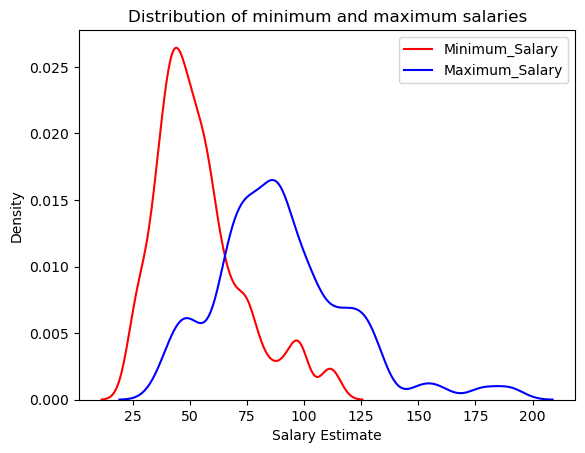

In [8]:
fig, ax = plt.subplots()
sns.kdeplot(x=df_gd['Minimum_Salary'],color='red',label='Minimum_Salary')
sns.kdeplot(x=df_gd['Maximum_Salary'],color='blue',label='Maximum_Salary')
leg = ax.legend();
plt.xlabel('Salary Estimate')
plt.title('Distribution of minimum and maximum salaries')
plt.show()

Lets pinpoint the sectors that appear most frequently

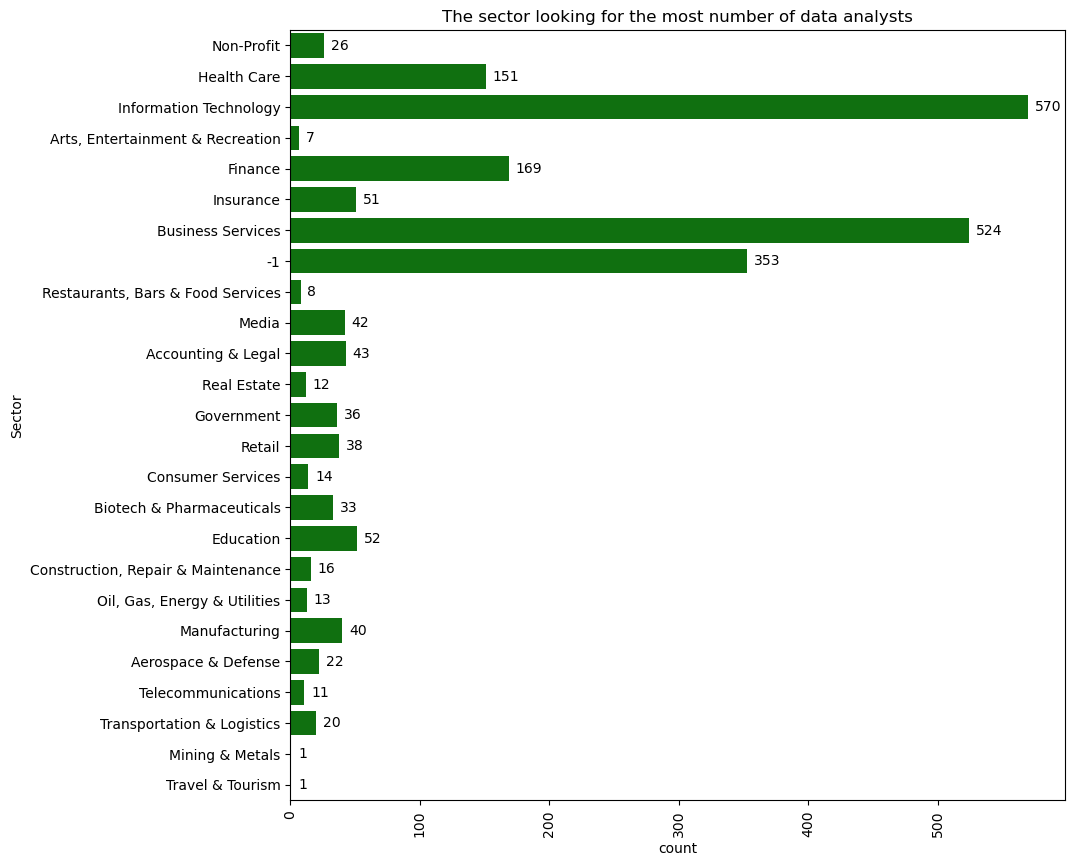

In [9]:
plt.figure(figsize=(10,10))
ax=sns.countplot(y=df_gd.Sector,color='green')
for container in ax.containers:
    ax.bar_label(container,padding=5)
plt.title('The sector looking for the most number of data analysts')
plt.xticks(rotation=90)
plt.show()

In [10]:
sector_value_counts = df_gd['Sector'].value_counts()

#check the count of '-1' in the 'Sector' column
count_of_minus_one = sector_value_counts.get('-1', 0)
print("Count of '-1' in the 'Sector' column:", count_of_minus_one)

Count of '-1' in the 'Sector' column: 353


In [11]:
df_cleaned = df_gd[df_gd['Sector'] != '-1']

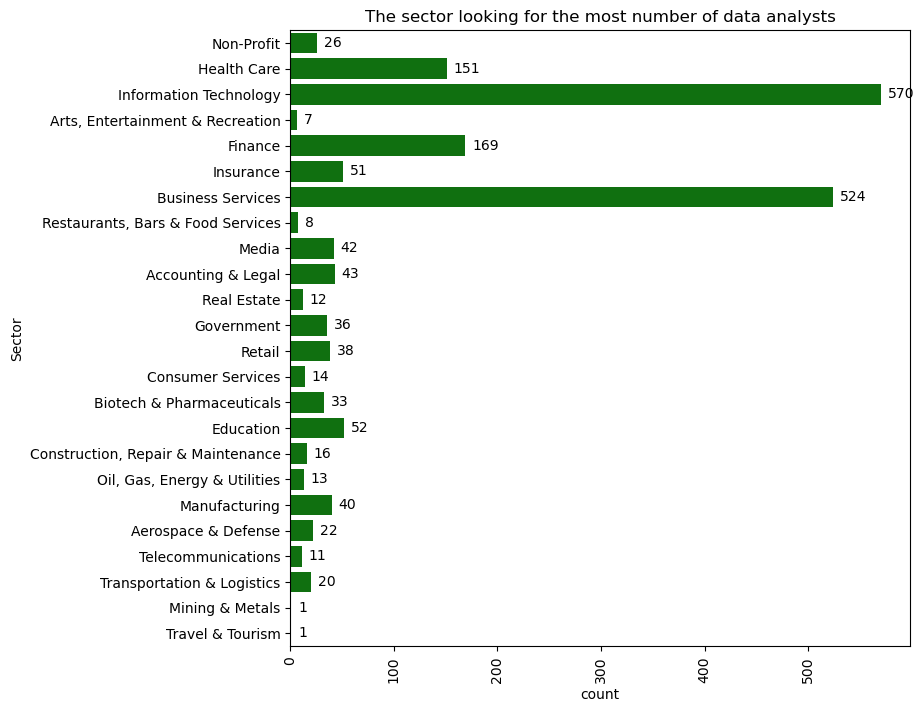

In [54]:
plt.figure(figsize=(8,8))
ax=sns.countplot(y=df_cleaned.Sector,color='green')
for container in ax.containers:
    ax.bar_label(container,padding=5)
plt.title('The sector looking for the most number of data analysts')
plt.xticks(rotation=90)
plt.show()

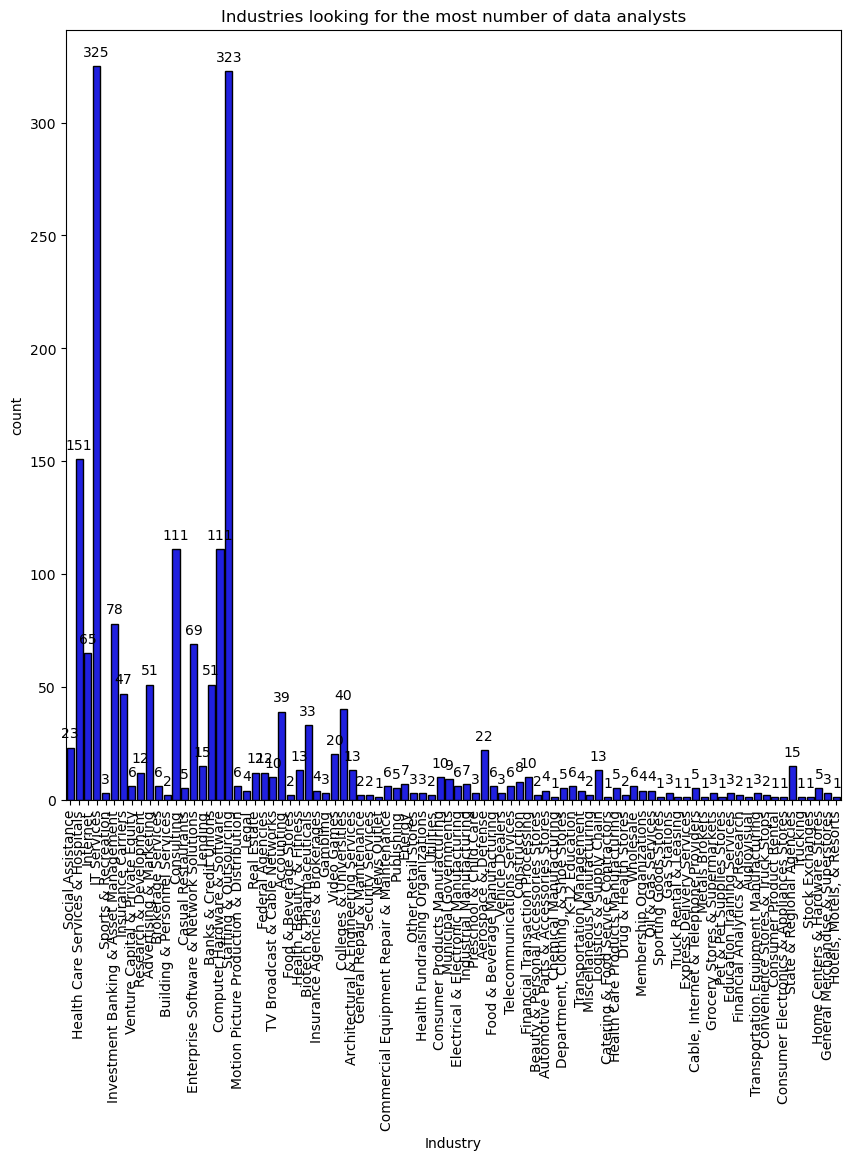

In [13]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x=df_cleaned.Industry,color='blue',edgecolor='#000000')
for container in ax.containers:
    ax.bar_label(container,padding=5)
plt.title('Industries looking for the most number of data analysts')
plt.xticks(rotation=90)
plt.show()

From the plot above, it is a bit difficult to see the sectors, we will focus on top 5 

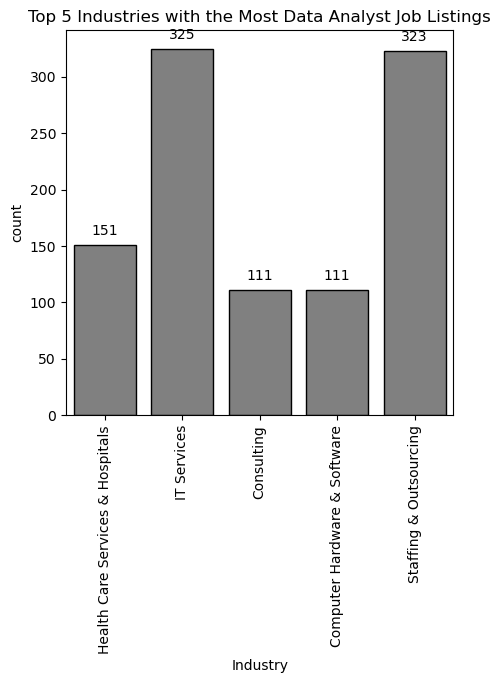

In [53]:
sector_counts = df_cleaned['Industry'].value_counts().sort_values(ascending=False)

#get the top 5 sectors with the most job listings
top_5_sectors = sector_counts.head(5).index

#filtering the DataFrame to include only rows with the top 5 sectors
df_filtered = df_cleaned[df_cleaned['Industry'].isin(top_5_sectors)]

plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Industry', data=df_filtered, color='grey', edgecolor='#000000')
for container in ax.containers:
    ax.bar_label(container, padding=5)
plt.title('Top 5 Industries with the Most Data Analyst Job Listings')
plt.xticks(rotation=90)
plt.show()

The plot highlights the top industries where data analyst roles are most prevalent. 
These industries might have a high need for data analysis and insights, potentially indicating growth or data-driven decision-making.

Now lets explore the ownership structure

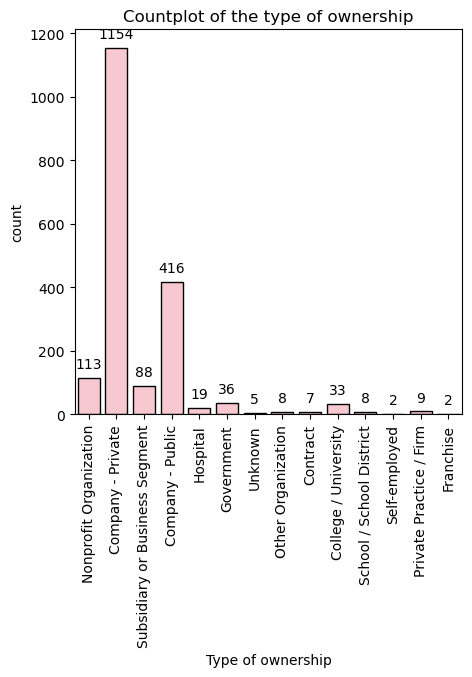

In [52]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df_cleaned["Type of ownership"],color='pink',edgecolor='#000000')
for container in ax.containers:
    ax.bar_label(container,padding=5)
plt.title('Countplot of the type of ownership')
plt.xticks(rotation=90)
plt.show()

Takeaways from this charts

1. Job Providers:
The majority of data analyst jobs are offered by privately-owned companies.

2. Salary Distribution:
Salary estimates reveal that most jobs have a minimum salary around 35,000 USD, while the maximum salary can reach as high as 70,000-90,000 USD.

3. Domain Knowledge Advantage:
Possessing functional knowledge in the relevant domain can be a significant advantage. According to Glassdoor data from 2020, the sectors with the highest demand for data analysts include:
    IT
    Business Services
    Finance

4. Industries in Demand:
The industries seeking the highest number of data analysts are primarily:
    1. Staffing and Outsourcing
    2. IT Services

# Extracting Job Requirements from Job Descriptions

In [16]:
df_cleaned['Job Description'][0]

"Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sifting through complex datasets to illuminate trends and insights? Do you see yourself working for a values-driven organization with a vision to tackle the most pressing injustices of our day?\n\nWe are looking to hire a bright, hard-working, and creative individual with strong data management skills and a demonstrated commitment to immigrant's rights. The Data Analyst will assist with analysis and reporting needs for Veras Center on Immigration and Justice (CIJ), working across its current projects and future Vera initiatives.\n\nWho we are:\n\nFounded in 1961, The Vera Institute is an independent, non-partisan, nonprofit organization that combines expertise in research, technical assistance, and demonstration projects to assist leaders in government and civil society examine justice policy and practice, and improve the systems people rely on for justice and safety.\nWe study problems that im

Cleaning Internet-Scraped Content, Eliminating Symbols and Stopwords for Analysis

In [17]:
import re

desired_words = []

#iterate through the 'Job Description' column
for description in df_cleaned['Job Description']:
    words_found = re.findall(r'\b(SQL|Python|PowerBI|Tableau)\b', description)#, flags=re.IGNORECASE)
    desired_words.extend(words_found)
    
desired_words = list(set(desired_words))
print(desired_words)

['SQL', 'Python', 'PowerBI', 'Tableau']


These skills are nearly universally required for data analyst positions.

Lets explore more about the description column by creating and displaying a word cloud visualization based on text data available

In [18]:
from nltk.corpus import stopwords

In [19]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', 
          '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
         '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', 
          '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
         '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
         '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
         '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', '💕','\n']

In [20]:
def clean_text(df_cleaned):
    stop = stopwords.words('english')
    res = []
    df_cleaned['Job Description'] = df_cleaned['Job Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    for x in df_cleaned['Job Description']:
        x = str(x)
        for punct in puncts:
            if punct in x:
                    x = x.replace(punct,' ')
        res.append(x)
    return res

In [21]:
df_cleaned['cleaned_desc'] = clean_text(df_cleaned)

C:\Users\pushp\AppData\Local\Temp\ipykernel_30660\3438611410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Job Description'] = df_cleaned['Job Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
C:\Users\pushp\AppData\Local\Temp\ipykernel_30660\2178391130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_desc'] = clean_text(df_cleaned)


In [22]:
df_cleaned.cleaned_desc

0       Are eager roll sleeves harness data drive poli...
1       Overview Provides analytical technical support...
2       We re looking Senior Data Analyst love mentors...
3       Requisition NumberRR 0001939 Remote Yes We col...
4       ABOUT FANDUEL GROUP FanDuel Group world class ...
                              ...                        
2247    Job Description Job Title  Marketing Communica...
2248    Maintains systems protect data unauthorized us...
2249    Position  Senior Data Analyst  Corporate Audit...
2251    Summary Responsible working cross functionally...
2252    You  You bring body  mind  heart spirit work S...
Name: cleaned_desc, Length: 1900, dtype: object

In [23]:
words_to_count = ['SQL', 'Python', 'PowerBi', 'Tableau']

# Initialize a dictionary to store the word counts
word_counts = {}

# Iterate through the words and count their occurrences
for word in words_to_count:
    word_counts[word] = df_cleaned['cleaned_desc'].str.count(fr'\b{word}\b', flags=re.IGNORECASE).sum()

# Print the word counts
print(word_counts)

{'SQL': 2083, 'Python': 708, 'PowerBi': 83, 'Tableau': 728}


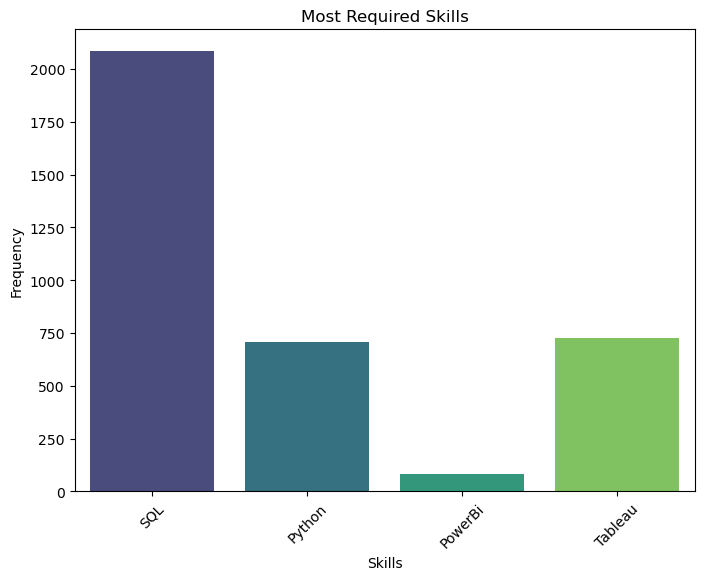

In [24]:
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count']).reset_index()
word_counts_df = word_counts_df.rename(columns={'index': 'Word'})

plt.figure(figsize=(8, 6))
sns.barplot(data=word_counts_df, x='Word', y='Count', palette='viridis')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Most Required Skills')
plt.xticks(rotation=45)
plt.show()

In [25]:
 def function(train):   
    comment_words = ""
    for i in train["cleaned_desc"]:
        val = str(i)
        tokens = val.split()
        for k in range(len(tokens)):
            tokens[k] = tokens[k].lower()
        comment_words += " ".join(tokens)+" "
    return comment_words

In [26]:
def plot_wordcloud(train):    
    from wordcloud import WordCloud, STOPWORDS
    comment_words = function(train)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10,collocations=False).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

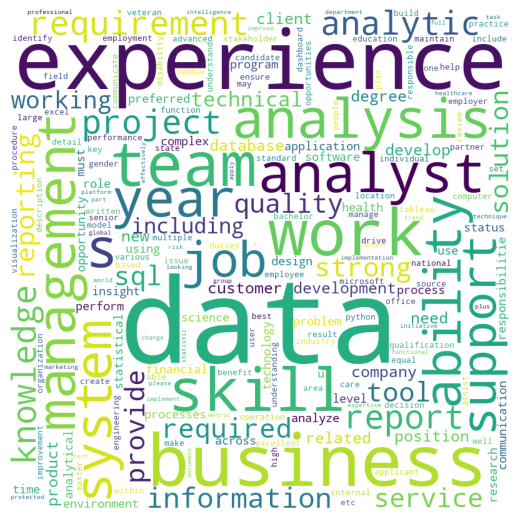

In [27]:
plot_wordcloud(df_cleaned)

# Now, we examine infromation from LinkedIn

LinkedIn's data, dated 2022, is more current than Glassdoor's 2020 data.
Now, let's explore if there are any other noteworthy insights.

Let's delve into LinkedIn job data specific to Canada and USA

In [28]:
df_can.columns

Index(['title', 'company', 'description', 'onsite_remote', 'salary',
       'location', 'criteria', 'posted_date', 'link'],
      dtype='object')

In [34]:
df_usa.columns

Index(['title', 'company', 'description', 'onsite_remote', 'salary',
       'location', 'criteria', 'posted_date', 'link'],
      dtype='object')

In [35]:
df_can.head(5)

title                  company  \
0  Data Analyst                  Axonify   
1  Data Analyst               B3 Systems   
2  Data Analyst           Wood Mackenzie   
3  Data Analyst  LOFT Community Services   
4  Data Analyst             NAM Info Inc   

                                         description onsite_remote salary  \
0  Axonify is an intelligent workforce enablement...        onsite    NaN   
1  The ideal candidate will use their passion for...        onsite    NaN   
2  Company DescriptionWood Mackenzie is the globa...        onsite    NaN   
3  1 Part Time Permanent PositionDATE: November 1...        onsite    NaN   
4  Position: Data AnalystWork Locations: Toronto,...        onsite    NaN   

                    location  \
0  Waterloo, Ontario, Canada   
1   Toronto, Ontario, Canada   
2   Calgary, Alberta, Canada   
3   Toronto, Ontario, Canada   
4   Toronto, Ontario, Canada   

                                            criteria posted_date  \
0  [{'Seniority level': 'Entry level'}, {'Employm...  2022-10-24   
1                 [{'Employment type': 'Full-time'}]  2022-11-18   
2  [{'Seniority level': 'Associate'}, {'Employmen...  2022-11-18   
3                 [{'Employment type': 'Part-time'}]  2022-11-17   
4  [{'Seniority level': 'Mid-Senior level'}, {'Em...  2022-11-08   

                                                link  
0  https://ca.linkedin.com/jobs/view/data-analyst...  
1  https://ca.linkedin.com/jobs/view/data-analyst...  
2  https://ca.linkedin.com/jobs/view/data-analyst...  
3  https://ca.linkedin.com/jobs/view/data-analyst...  
4  https://ca.linkedin.com/jobs/view/data-analyst...

In [36]:
df_usa.head(5)

title                   company  \
0  Data Analyst - Recent Graduate                    PayPal   
1  Data Analyst - Recent Graduate                    PayPal   
2                    Data Analyst                    PayPal   
3                    Data Analyst                    PayPal   
4        Entry-Level Data Analyst  The Federal Savings Bank   

                                         description onsite_remote salary  \
0  At PayPal (NASDAQ: PYPL), we believe that ever...        onsite    NaN   
1  At PayPal (NASDAQ: PYPL), we believe that ever...        onsite    NaN   
2  At PayPal (NASDAQ: PYPL), we believe that ever...        onsite    NaN   
3  At PayPal (NASDAQ: PYPL), we believe that ever...        onsite    NaN   
4  The Federal Savings Bank, a national bank and ...        onsite    NaN   

                     location  \
0  Buffalo-Niagara Falls Area   
1                San Jose, CA   
2        Texas, United States   
3     Illinois, United States   
4                 Chicago, IL   

                                            criteria posted_date  \
0  [{'Seniority level': 'Not Applicable'}, {'Empl...  2022-11-22   
1  [{'Seniority level': 'Not Applicable'}, {'Empl...  2022-11-22   
2  [{'Seniority level': 'Not Applicable'}, {'Empl...  2022-11-17   
3  [{'Seniority level': 'Not Applicable'}, {'Empl...  2022-11-17   
4  [{'Seniority level': 'Entry level'}, {'Employm...  2022-11-17   

                                                link  
0  https://www.linkedin.com/jobs/view/data-analys...  
1  https://www.linkedin.com/jobs/view/data-analys...  
2  https://www.linkedin.com/jobs/view/data-analys...  
3  https://www.linkedin.com/jobs/view/data-analys...  
4  https://www.linkedin.com/jobs/view/entry-level...

Checking the distribution of the jobs

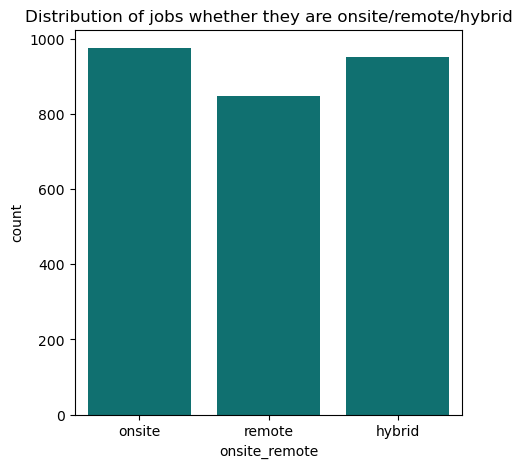

In [37]:
#for Canada
fig = plt.figure(figsize=(5,5))
sns.countplot(x=df_can['onsite_remote'], color='teal')
plt.title('Distribution of jobs whether they are onsite/remote/hybrid')
plt.show()

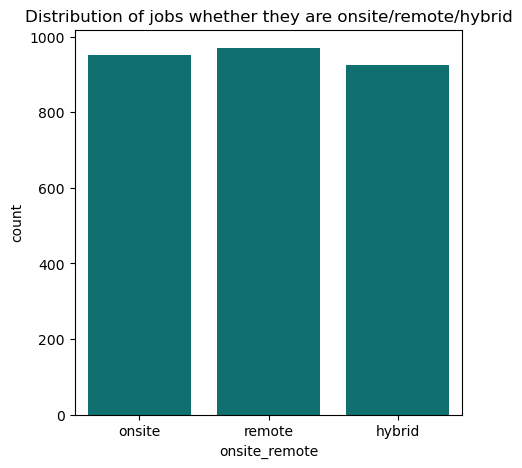

In [38]:
#for USA
fig = plt.figure(figsize=(5,5))
sns.countplot(x=df_usa['onsite_remote'], color='teal')
plt.title('Distribution of jobs whether they are onsite/remote/hybrid')
plt.show()

Across the two locations, it's evident that job distributions for on-site, remote, and hybrid positions appear well-balanced. 
This presents favorable choices for data analysts, allowing them to align with companies that offer their preferred work mode.

Concanteniating the two datasets as one for analysis.
Combining datasets from both the USA and Canada will allow for a broader analysis of the North American job market.

In [39]:
df_jobs = pd.concat([df_can, df_usa]).reset_index().drop(['index'], axis=1)
df_jobs.head(5)

title                  company  \
0  Data Analyst                  Axonify   
1  Data Analyst               B3 Systems   
2  Data Analyst           Wood Mackenzie   
3  Data Analyst  LOFT Community Services   
4  Data Analyst             NAM Info Inc   

                                         description onsite_remote salary  \
0  Axonify is an intelligent workforce enablement...        onsite    NaN   
1  The ideal candidate will use their passion for...        onsite    NaN   
2  Company DescriptionWood Mackenzie is the globa...        onsite    NaN   
3  1 Part Time Permanent PositionDATE: November 1...        onsite    NaN   
4  Position: Data AnalystWork Locations: Toronto,...        onsite    NaN   

                    location  \
0  Waterloo, Ontario, Canada   
1   Toronto, Ontario, Canada   
2   Calgary, Alberta, Canada   
3   Toronto, Ontario, Canada   
4   Toronto, Ontario, Canada   

                                            criteria posted_date  \
0  [{'Seniority level': 'Entry level'}, {'Employm...  2022-10-24   
1                 [{'Employment type': 'Full-time'}]  2022-11-18   
2  [{'Seniority level': 'Associate'}, {'Employmen...  2022-11-18   
3                 [{'Employment type': 'Part-time'}]  2022-11-17   
4  [{'Seniority level': 'Mid-Senior level'}, {'Em...  2022-11-08   

                                                link  
0  https://ca.linkedin.com/jobs/view/data-analyst...  
1  https://ca.linkedin.com/jobs/view/data-analyst...  
2  https://ca.linkedin.com/jobs/view/data-analyst...  
3  https://ca.linkedin.com/jobs/view/data-analyst...  
4  https://ca.linkedin.com/jobs/view/data-analyst...

In [40]:
#number of rows and columns in a dataframe
df_jobs.shape

(5618, 9)

# Preprocessing title and description columns

In [41]:
#defining a Python function named clean_text that performs text preprocessing on a given input string. 
import string
def clean_text(text):
    text = text.lower() # convert letters to lower case
    text = re.sub("[^a-zA-Z]", " ", text) #remove non-letters
    text = re.sub(r'\d+', '', text) #remove number
    text = re.sub(r'http\S+', '', text) #remove links
    text = text.translate(str.maketrans('','', string.punctuation)) #remove punctuation
    text = re.sub(' +', ' ',text) #remove extra space
    text = text.strip() #remove whitespaces
    return text

In [42]:
#apply function
df_jobs['title'] = df_jobs['title'].apply(clean_text)
df_jobs['description'] = df_jobs['description'].apply(clean_text)

In [43]:
#a quick df check to see the effects
df_jobs.head(5)

title                  company  \
0  data analyst                  Axonify   
1  data analyst               B3 Systems   
2  data analyst           Wood Mackenzie   
3  data analyst  LOFT Community Services   
4  data analyst             NAM Info Inc   

                                         description onsite_remote salary  \
0  axonify is an intelligent workforce enablement...        onsite    NaN   
1  the ideal candidate will use their passion for...        onsite    NaN   
2  company descriptionwood mackenzie is the globa...        onsite    NaN   
3  part time permanent positiondate november th l...        onsite    NaN   
4  position data analystwork locations toronto on...        onsite    NaN   

                    location  \
0  Waterloo, Ontario, Canada   
1   Toronto, Ontario, Canada   
2   Calgary, Alberta, Canada   
3   Toronto, Ontario, Canada   
4   Toronto, Ontario, Canada   

                                            criteria posted_date  \
0  [{'Seniority level': 'Entry level'}, {'Employm...  2022-10-24   
1                 [{'Employment type': 'Full-time'}]  2022-11-18   
2  [{'Seniority level': 'Associate'}, {'Employmen...  2022-11-18   
3                 [{'Employment type': 'Part-time'}]  2022-11-17   
4  [{'Seniority level': 'Mid-Senior level'}, {'Em...  2022-11-08   

                                                link  
0  https://ca.linkedin.com/jobs/view/data-analyst...  
1  https://ca.linkedin.com/jobs/view/data-analyst...  
2  https://ca.linkedin.com/jobs/view/data-analyst...  
3  https://ca.linkedin.com/jobs/view/data-analyst...  
4  https://ca.linkedin.com/jobs/view/data-analyst...

In [44]:
# title words frequency
title_words_frequency = df_jobs.title.str.split(expand=True).stack() #split title into words
title_words_frequency_df = pd.DataFrame(title_words_frequency.value_counts()) #create a new dataframe to store word count

index_filter = [i  for i in title_words_frequency_df.index if i not in stopwords.words("english")]

title_words_frequency_df_without_stop_word = title_words_frequency_df.loc[index_filter]
title_words_frequency_df_without_stop_word = title_words_frequency_df_without_stop_word.rename(columns={0:'Counts'}) #rename column to 'Counts'

#top 20 words in title
top_20_words_in_title = title_words_frequency_df_without_stop_word.iloc[:20]

In [45]:
#using the Plotly Express library to create a bar chart to visualize the frequency of the top 20 words in a dataset
fig = px.bar(top_20_words_in_title, 
             y=top_20_words_in_title.Counts, 
             x=top_20_words_in_title.index, 
             template=  "simple_white"  ,
             title= "Frequency of top 20 words in title",
             color_discrete_sequence = px.colors.sequential.Teal_r,  
             labels={'index':'Word', 'Counts':"Frequency of word"},
             text=['{}'.format(p) for p in top_20_words_in_title.Counts]
            )

fig.update_layout(coloraxis_showscale=False)
fig.show()

As observed in the bar chart above, companies incorporate various details within job titles, encompassing:
Job Type (e.g., remote)
Seniority Level (senior, junior, entry)
Employment Type (contract)
Skills and Programming Languages (e.g., SQL, python)

Lets have a look at the description

In [46]:
#description words frequency
description_words_frequency = df_jobs.description.str.split(expand=True).stack() #split description into words
description_words_frequency_df = pd.DataFrame(description_words_frequency.value_counts())  

index_filter = [i  for i in description_words_frequency_df.index if i not in stopwords.words("english")]  

description_words_frequency_df_without_stop_word = description_words_frequency_df.loc[index_filter] 
description_words_frequency_df_without_stop_word = description_words_frequency_df_without_stop_word.rename(columns={0:'Counts'}) #renaming column to 'Counts'

#frequency of top 20 words in description
top_20_words_in_description = description_words_frequency_df_without_stop_word.iloc[:20]

In [47]:
fig = px.bar(top_20_words_in_description, 
             y=top_20_words_in_description.Counts, 
             x=top_20_words_in_description.index, 
             template=  "simple_white"  ,
             title= "Frequency of top 20 words in description",
             color_discrete_sequence = px.colors.sequential.Teal_r,  
             labels={'index':'Word', 'Counts':"Frequency of word"},
             text=['{}'.format(p) for p in top_20_words_in_description.Counts]
            )

fig.update_layout(coloraxis_showscale=False)
fig.show()

Following points can be inferred from the graph above:
Common Term 'Data': The word 'Data' being the most common word in job descriptions is expected because data analysis is the primary focus of these positions. This suggests that companies are clearly emphasizing the data-related aspects of the job.

Variations of 'Analysis': The presence of variations of the word 'Analysis' (e.g., 'analysis,' 'analytics,' 'analyst') indicates that companies may describe the job in different ways but are essentially looking for individuals with strong analytical skills. This insight highlights the importance of having analytical skills in the field of data analysis.

Work Environment Emphasis: Words like 'business,' 'experience,' 'work,' and 'team' suggest that companies are not only looking for technical skills but also emphasize the work environment and experience. This indicates that data analysts are expected to collaborate with teams and contribute to the business's goals.

Relevant Skills: While the specific skills required for each job may vary, this analysis suggests that it's important for data analysts to possess a combination of technical and teamwork skills. Having the ability to work within a business context, communicate effectively, and collaborate with colleagues is valuable in this role.

Lets add a new column with only location to check the posted jobs in the two locations based on job type

In [48]:
# Split location column into City and Country
df_jobs[['City', 'Country']] = df_jobs['location'].str.rsplit(', ', 1, expand=True)

# Drop the original location column if you don't need it anymore
df_jobs.drop('location', axis=1, inplace=True)

In [49]:
df_jobs.head(5)

title                  company  \
0  data analyst                  Axonify   
1  data analyst               B3 Systems   
2  data analyst           Wood Mackenzie   
3  data analyst  LOFT Community Services   
4  data analyst             NAM Info Inc   

                                         description onsite_remote salary  \
0  axonify is an intelligent workforce enablement...        onsite    NaN   
1  the ideal candidate will use their passion for...        onsite    NaN   
2  company descriptionwood mackenzie is the globa...        onsite    NaN   
3  part time permanent positiondate november th l...        onsite    NaN   
4  position data analystwork locations toronto on...        onsite    NaN   

                                            criteria posted_date  \
0  [{'Seniority level': 'Entry level'}, {'Employm...  2022-10-24   
1                 [{'Employment type': 'Full-time'}]  2022-11-18   
2  [{'Seniority level': 'Associate'}, {'Employmen...  2022-11-18   
3                 [{'Employment type': 'Part-time'}]  2022-11-17   
4  [{'Seniority level': 'Mid-Senior level'}, {'Em...  2022-11-08   

                                                link               City  \
0  https://ca.linkedin.com/jobs/view/data-analyst...  Waterloo, Ontario   
1  https://ca.linkedin.com/jobs/view/data-analyst...   Toronto, Ontario   
2  https://ca.linkedin.com/jobs/view/data-analyst...   Calgary, Alberta   
3  https://ca.linkedin.com/jobs/view/data-analyst...   Toronto, Ontario   
4  https://ca.linkedin.com/jobs/view/data-analyst...   Toronto, Ontario   

  Country  
0  Canada  
1  Canada  
2  Canada  
3  Canada  
4  Canada

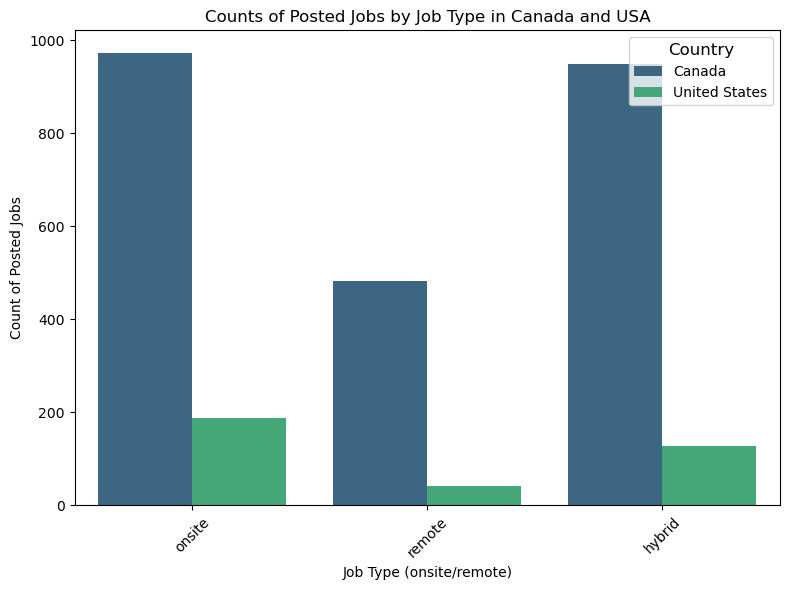

In [50]:
#filter the DataFrame for Canada and USA
filtered_df = df_jobs[df_jobs['Country'].isin(['Canada', 'United States'])]

#create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df, x='onsite_remote', hue='Country', palette='viridis')

#set plot labels and title
plt.xlabel('Job Type (onsite/remote)')
plt.ylabel('Count of Posted Jobs')
plt.title('Counts of Posted Jobs by Job Type in Canada and USA')

#show the plot
plt.xticks(rotation=45)
plt.legend(title='Country', title_fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()

Canada has the highest number of jobs compared to the United Satates.

Here are some key observations from the data analysis:

Common Term 'Data': The word 'Data' being the most common word in job descriptions is expected because data analysis is the primary focus of these positions. This suggests that companies are clearly emphasizing the data-related aspects of the job.

Variations of 'Analysis': The presence of variations of the word 'Analysis' (e.g., 'analysis,' 'analytics,' 'analyst') indicates that companies may describe the job in different ways but are essentially looking for individuals with strong analytical skills. This insight highlights the importance of having analytical skills in the field of data analysis.

Work Environment Emphasis: Words like 'business,' 'experience,' 'work,' and 'team' suggest that companies are not only looking for technical skills but also emphasize the work environment and experience. This indicates that data analysts are expected to collaborate with teams and contribute to the business's goals.

Relevant Skills: While the specific skills required for each job may vary, this analysis suggests that it's important for data analysts to possess a combination of technical and teamwork skills. Having the ability to work within a business context, communicate effectively, and collaborate with colleagues is valuable in this role.